In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import numpy as np

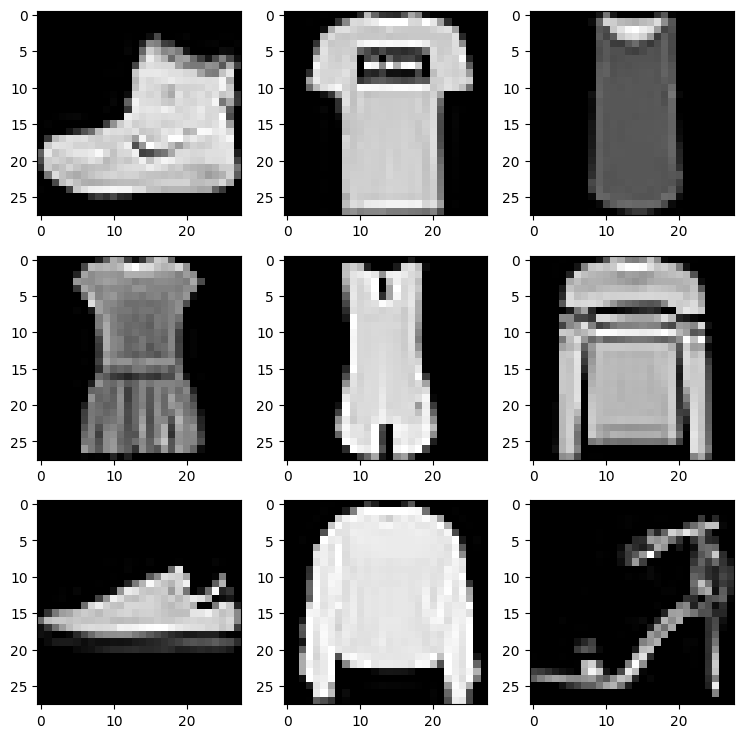

In [15]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
plt.figure(figsize=(9,9))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_X[i], cmap='gray')
plt.show()

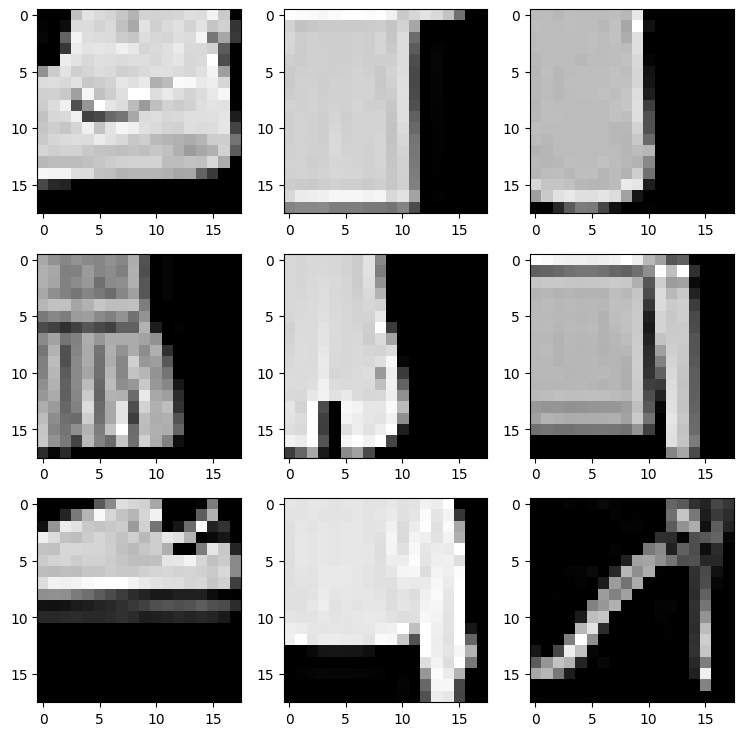

In [16]:
def extract_region(image, seed_position, stop_condition):
    if image.dtype != np.uint8:
        raise ValueError("Input image must be a single-channel 8-bit image")

    x, y = seed_position
    stop_x, stop_y = stop_condition
    region = image[y:stop_y, x:stop_x]

    return region

seed_position = (10, 10)
stop_condition = (30, 30)

extracted_regions = []

for image in train_X:
    region = extract_region(image, seed_position, stop_condition)
    extracted_regions.append(region)

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(extracted_regions[i], cmap='gray')
plt.show()


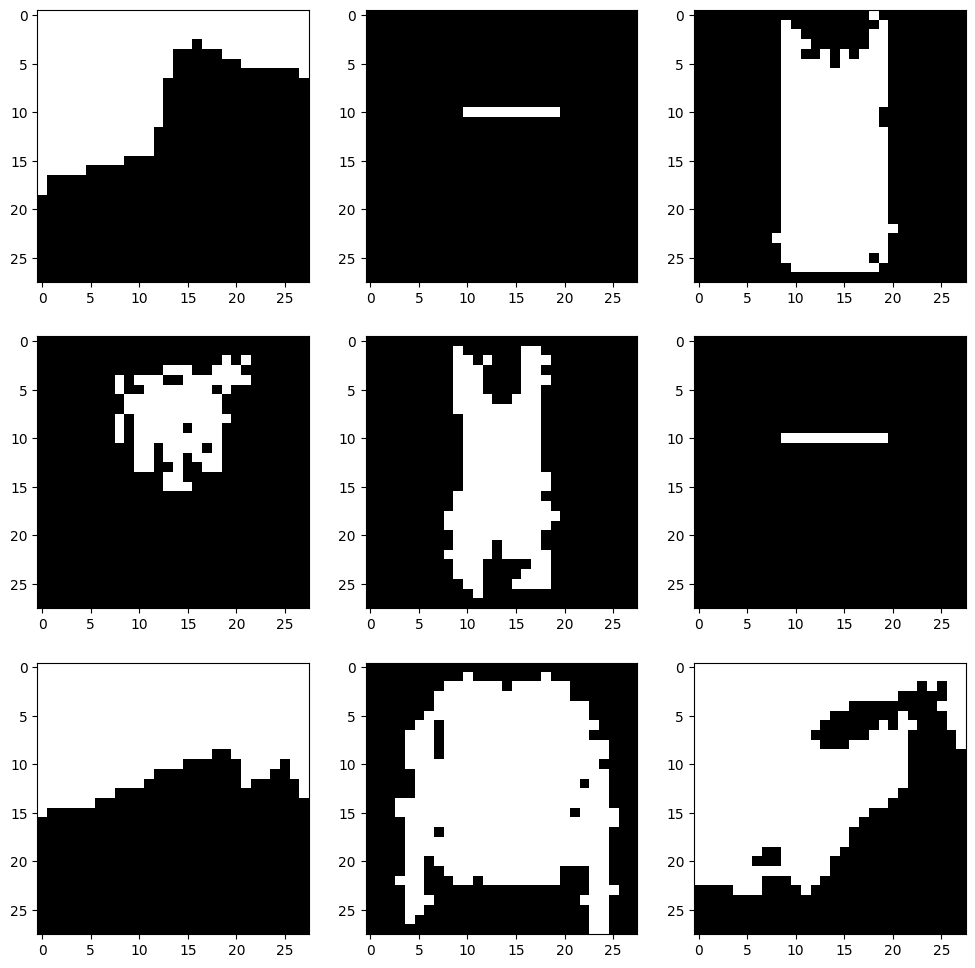

In [ ]:
def region_growing(image, seed_position, threshold):
    if image.dtype != np.uint8:
        raise ValueError("Input image must be a single-channel 8-bit image")

    x, y = seed_position
    region_mean = image[y, x]
    region = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=bool)

    queue = [(x, y)]

    while queue:
        current_x, current_y = queue.pop(0)

        if (current_x < 0 or current_x >= image.shape[1] or current_y < 0 or current_y >= image.shape[0] or
            visited[current_y, current_x]):
            continue

        visited[current_y, current_x] = True

        if abs(int(image[current_y, current_x]) - int(region_mean)) <= threshold:
            region[current_y, current_x] = 255
            region_mean = np.mean(image[region > 0])

            for i in range(-1, 2):
                for j in range(-1, 2):
                    if i == 0 and j == 0:
                        continue
                    queue.append((current_x + i, current_y + j))

    return region


seed_position = (10, 10)
threshold = 20

regions = []
for image in train_X:
    region = region_growing(image, seed_position, threshold)
    regions.append(region)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(regions[i], cmap='gray')
plt.show()
